# TITANIC

Estos datos pertenecen al accidente del transatlántico Titanic, que tuvo lugar el en la noche del 14 al 15 de abril de 1912. Gracias a esta información, podemos ver con más precisión que variables numéricas se dieron aquella fatidica noche y nos puede servir de cara a prevenir futuros accidentes y sobretodo a aumentar las posibilidades de sobrevivir ante una catastrofe de esta magnitud. A continuación veremos como cualquier cambio de decisión que se hubiera tomado previamente a subirse al barco por parte de cada pasajero, podía haberles cambiado la vida radicalmente.

### Variables

<table>
  <tr>
    <th>Nombre de la columna</th>
    <th>Descripción</th>
  </tr>
  <tr>
    <td>PassengerId</td>
    <td>Muestra el id del pasajero.</td>
  </tr>
  <tr>
    <td>Survived</td>
    <td>Si sobrevivió o no, siendo 2 valores, el 0 si murió y el 1 si vivió.</td>
  </tr>
  <tr>
    <td>Pclass</td>
    <td>Determina la clase del pasajero por orden de calidad, 1ª, 2ª, 3ª.</td>
  </tr>
  <tr>
    <td>Name</td>
    <td>Nombre completo de los pasajeros.</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>Género de los pasajeros.</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Edad de los pasajeros.</td>
  </tr>
  <tr>
    <td>SibSp</td>
    <td>Numero de parientes como hermano/a, hermanastro/a, esposo/a.</td>
  </tr>
  <tr>
    <td>Parch</td>
    <td>Numero de parientes como madre, padre, hijo/a, hijastro/a.</td>
  </tr>
  <tr>
    <td>Ticket</td>
    <td>Numero de ticket o boleto.</td>
  </tr>
  <tr>
    <td>Fare</td>
    <td>Tarifa del pasaje.</td>
  </tr>
  <tr>
    <td>Cabin</td>
    <td>Número de cabina del pasajero.</td>
  </tr>
  <tr>
    <td>Embarked</td>
    <td>Datos del puerto de embarque (C = Cherbourg, Q = Queenston, S = Southapmtpon).</td>
  </tr>
</table>

Los pasos a seguir

1. **Explorar el conjunto de datos**: Comprender la estructura del conjunto de datos, los tipos de variables presentes y cómo estas están distribuidas.
   **Limpiar y preparar el conjunto de datos**: Manipular los datos para que sean más accesibles y útiles para el análisis. Esto puede incluir tratar con valores faltantes, convertir tipos de datos y generar nuevas variables a partir de las existentes.
   
2. **Analizar el conjunto de datos**: Extraer información útil y significativa del conjunto de datos a través de diversas técnicas de análisis de datos. </br>
   **Visualizar los datos**: Crear gráficos y diagramas que ayuden a entender y comunicar los patrones y las relaciones presentes en los datos.

## Primer paso, la carga de datos, limpieza, exploración y primera comprensión de nuestro dataset

### Importamos librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

### Cargamos el Dataset

In [2]:
# Leemos el dataset y lo convertimos en un dataframe
df = pd.read_csv('titanic.csv')

In [3]:
# Imprimimos el dataset
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


¿Cuántas entradas (filas) y variables (columnas) tiene el conjunto de datos?

In [4]:
df.shape

(891, 12)

¿Existen valores nulos en el dataset?

In [5]:
# Vemos el número de nulos en las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Existen un total de:  866  Valores nulos en nuestro conjunto de datos


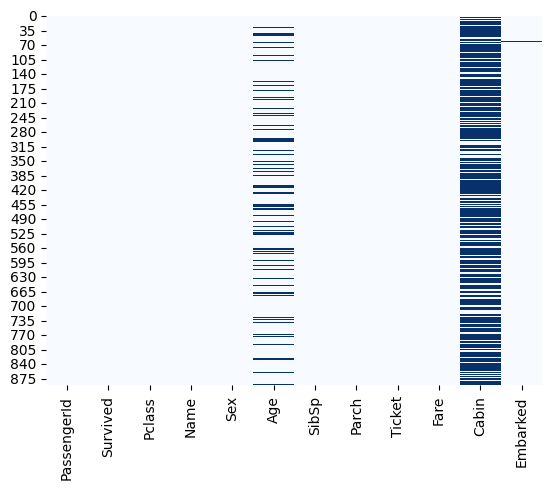

In [6]:
sns.heatmap(df.isnull(), cbar=False, cmap="Blues")
print("Existen un total de: ", df.isnull().sum().sum(), " Valores nulos en nuestro conjunto de datos")

Vemos que en la columna 'Age' hay pocos valores nulos por lo que se puede reparar, mientras que en 
la columna 'Cabin' hay bastantes más por lo que procederemos a eliminarla. Asimismo en la columna 'Embarked' hay solamente 2, por lo que procederemos a rellenar esos datos tambien.

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
media = df['Age'].mean() # Calculamos la media de la columna
print(media)

29.69911764705882


In [9]:
df['Age'].fillna(media, inplace= True) # Rellenamos la columna Age con la media ya que es de tipo Float

In [10]:
moda = df['Embarked'].mode().values[0] # Calculamos la moda de la columna

In [11]:
df['Embarked'].fillna(moda, inplace= True) # Rellenamos la columna Embarked con la moda ya que es de tipo object

In [12]:
df.isnull().sum() # Comprobamos que no hay valores nulos en las columnas reparadas

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
df.drop('Cabin', axis=1, inplace=True) # Eliminamos la columna 'Cabin'

In [14]:
df.info() # Comprobamos que ya no hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

Una vez reparado el dataset, vemos que tipos de columnas tenemos y como podemos jugar con ellas

In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [18]:
#Sacamos los nombres de las columnas numericas y categoricas
def tipo_de_columnas_ordenadas (df):
    cat = []
    num = []
        
    for col in df.columns:
        if(df[col].dtype == "object"):
            cat.append(col)
        else:
            num.append(col)

    return cat , num

cat , num = tipo_de_columnas_ordenadas(df)
print("Las columnas categoricas son: ", cat)
print("Las columnas numericas son: ", num)

Las columnas categoricas son:  ['Name', 'Sex', 'Ticket', 'Embarked']
Las columnas numericas son:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


## Visualizacion y analisis de los datos de manera atractiva

Al no habernos propuesto un objetivo especifico sobre este conjunto de datos, lo que vamos a hacer es unas cuantas preguntas interesantes y ver como las respuestas nos sirven para identificar un posible patrón o simplemente reflejarán datos comunes que no nos levantan sospecha.

### Preguntas interesantes sobre el Dataset

- ¿Cuantas personas han sobrevivido?
- ¿Había más mujeres o más hombres?
- ¿Cual es el % de mujeres que sobrevivieron, y de hombres?
- ¿Cuales fueron las personas con mayor y menor edad en subir al barco?¿Y la edad media?
- ¿Cual es la tasa de supervivencia por edades?
- ¿Cual es la distribución de edades por clase?
- ¿Qué relación hay entre la clase del pasajero y si sobrevivieron o no?
- ¿Y entre la edad y el genero con si sobrevivieron o no?
- ¿Cual es la tasa de superviviencia si se va en familia?
- ¿Cuales fueron los 10 billetes más caros?¿Quién los ha comprado?
- ¿Qué relación hay entre el precio y el puerto de embarcadero?
- ¿Cual fue el puerto de embarque donde sobrevivieron más personas?

In [19]:
sns.set_theme(style="darkgrid") # Para las cuadriculas del fondo, se reflejará en todas las posibles

#### ¿Cuantas personas han sobrevivido?

In [20]:
df['Survived'].value_counts() # Donde el 1 es que sobrevivieron, se ve que menos de la mitad sobrevivieron al accidente

Survived
0    549
1    342
Name: count, dtype: int64

La primera de las preguntas es la que se nos viene a todos a la cabeza, cifras de supervivientes, como vemos en los resultados, más de la mitad de los pasajeros, fallecieron en el accidente, veamos a continuación como graficamente se visualiza mejor.

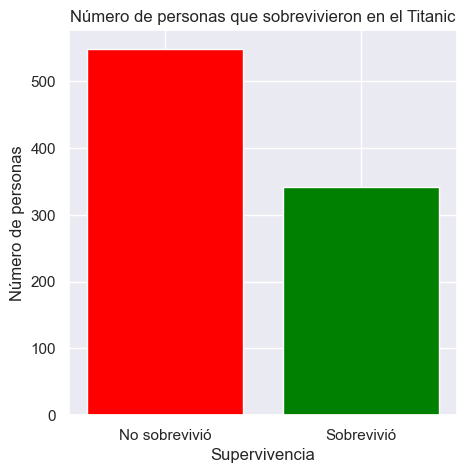

In [21]:
# Crear un gráfico de barras para reflejarlo de maneras más fácil y visual
supervivientes = df['Survived'].value_counts()
supervivientes_columnas = ['No sobrevivió', 'Sobrevivió']

plt.figure(figsize=(5, 5)) # Tamaño uniforme
plt.bar(supervivientes_columnas, supervivientes, color=['red', 'green']) # Colores caracteristicos con la supervivencia
plt.title('Número de personas que sobrevivieron en el Titanic')
plt.xlabel('Supervivencia')
plt.ylabel('Número de personas')

plt.show()

#### ¿Había más mujeres o más hombres?

In [22]:
df['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


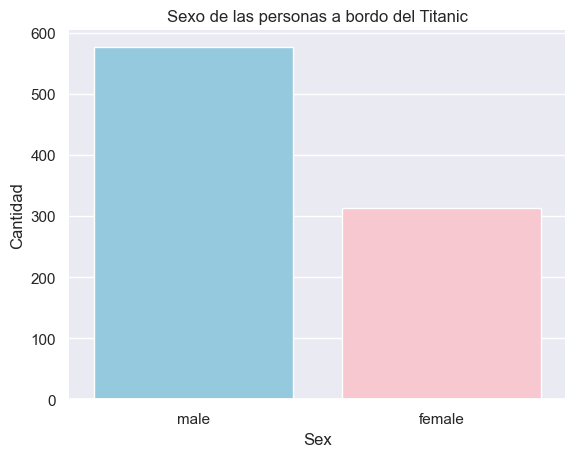

In [23]:
sns.countplot(x=df['Sex'],data=df, palette={'male': '#87CEEB', 'female': 'pink'}) # Mezclamos 2 maneras de cambio de color
plt.ylabel('Cantidad') # Añade un titulo al eje Y
plt.title("Sexo de las personas a bordo del Titanic")
sns.despine(left=True) # Suprimimos el marco tanto de arriba como de la izquierda

In [24]:
total_pasajeros = len(df) # Creamos la variable
mujeres = df[df['Sex'] == 'female'] # Separamos la variable mujeres
hombres = df[df['Sex'] == 'male'] # Separamos la variable hombre

porcentaje_mujeres = (len(mujeres) / total_pasajeros) * 100 # Dividimos la cantidad de mujeres entre el total
porcentaje_hombres = (len(hombres) / total_pasajeros) * 100 # Dividimos la cantidad de hombres entre el total

print(f"Mujeres: {porcentaje_mujeres}%")
print(f"Hombres: {porcentaje_hombres}%")


Mujeres: 35.24130190796858%
Hombres: 64.75869809203144%


In [25]:
Porcentaje_genero = pd.DataFrame({'Género': ['Mujeres', 'Hombres'], 'Porcentaje': [porcentaje_mujeres, porcentaje_hombres]})

fig = px.pie(Porcentaje_genero, names='Género', values='Porcentaje', title='Porcentaje del género de los pasajeros', color_discrete_sequence=['#87CEEB','pink'])
fig.update_traces(textfont_size=20, marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_font_size = 25, legend_font_size=18)
fig.show()


En el barco predominaba más el genero masculino, con un 64,8% frente a los 35,2% del genero femenino, posiblemente la razón principal sea la época, ya que hace más de 100 años que se embarcó en el Titanic

#### ¿Cual es el % de mujeres que sobrevivieron, y de hombres?

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



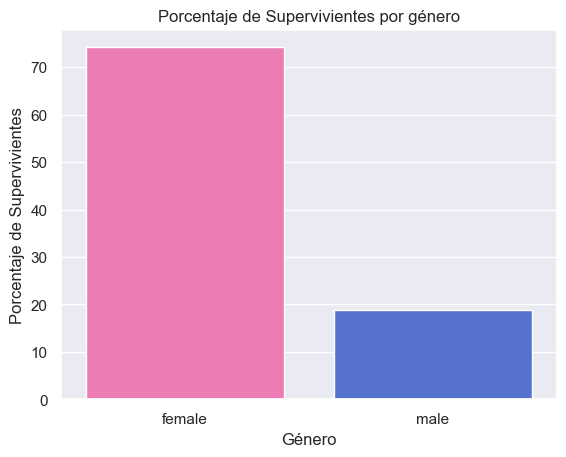

In [26]:
# Primero hay que agrupar la columna sexo y supervivientes
Superviviente_por_genero = df.groupby(['Sex', 'Survived']).size().unstack()

# Ahora calculamos el porcentaje de supervivientes por género
Porcentaje_supervivientes = (Superviviente_por_genero[1] / (Superviviente_por_genero[0] + Superviviente_por_genero[1])) * 100

# Creamos la gráfica y cambiamos los colores de la anterior para que haya diferencia
sns.barplot(x=Porcentaje_supervivientes.index, y=Porcentaje_supervivientes.values, palette={'male': '#4169E1', 'female': '#FF69B4'})
plt.xlabel('Género')
plt.ylabel('Porcentaje de Supervivientes')
plt.title('Porcentaje de Supervivientes por género')
plt.show()

In [27]:
print(Porcentaje_supervivientes)

Sex
female    74.203822
male      18.890815
dtype: float64


A pesar de que el género masculino fuera mayoritario, como vemos en la grafica anterior, las mujeres fueron las que más sobrevivieron al accidente, casi 3 de 4 pudieron salir con vida. Como se ha documentado siempre tanto por escrito como en video, aquel día a la hora de salvarse, se dio preferencia a las mujeres y a los niños

#### ¿Cuales fueron las personas con mayor y menor edad en subir al barco?¿Y la edad media?

In [28]:
df['Age'].describe() 
# Aquí tenemos a la persona más longeva con 80 años y la más pequeña con 0 años y 4 meses. 
# También tenemos la media de edad, situada en 29,7 años.

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [29]:
fig = px.histogram(df, x='Age', nbins=30)

fig.update_layout(xaxis_title='Años', yaxis_title='Cantidad', title='Edad de las personas a bordo del Titanic')

fig.show()

#### ¿Cual es la tasa de supervivencia por edades?

C:\Users\asus\AppData\Local\Temp\ipykernel_3860\1393560926.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



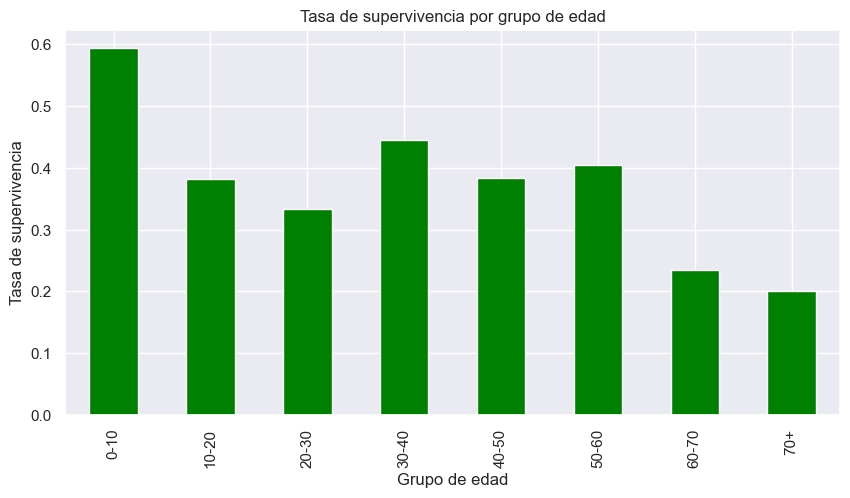

In [30]:
# Crear grupos de edad
bins = [0, 10, 20, 30, 40, 50, 60, 70, 120]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']
df['AgeGroup'] = pd.cut(df['Age'], bins, labels=labels)

# Calcular la tasa de supervivencia por grupo de edad
Supervivencia_edad = df.groupby('AgeGroup')['Survived'].mean()

# Visualizar la tasa de supervivencia por grupo de edad
Supervivencia_edad.plot(kind='bar', figsize=(10, 5), color = 'green')
plt.title('Tasa de supervivencia por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Tasa de supervivencia')
plt.show()

Como vemos en estos gráficos, la tendencia en cuanto a la edad de los pasajeros era más bien joven, situando la media en 29 años, asimismo vemos como en cuanto a la tasa de supervivencia hay una tendencia igualitaria salvo los extremos, que como hemos comentado antes, los niños tenían preferencia a la hora de ponerles a salvo mientras que la edad más adulta era la clara perjudicada del accidente

#### ¿Cual es la distribución de edades por clase?

In [31]:
fig = go.Figure()

for pclass in sorted(df['Pclass'].unique()):
    fig.add_trace(go.Box(y=df.loc[df['Pclass'] == pclass, 'Age'], name=f'Clase {pclass}', boxpoints='all'))

fig.update_layout(title='Distribución de edades por clase en el Titanic', xaxis_title='Clase', yaxis_title='Edad')
fig.show()

Aquí se refleja probablemente el poder económico de la época, como según va bajando el nivel de la clase, la edad también disminuye viendose también más comprimido el rango de edad.

#### ¿Qué relacion hay entre la clase del pasajero y si sobrevivieron o no?

In [32]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [33]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [34]:
# Primero hay que agrupar la columna clase y supervivientes
Superviviente_por_clase = df.groupby(['Pclass', 'Survived']).size().unstack()
print(Superviviente_por_clase)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


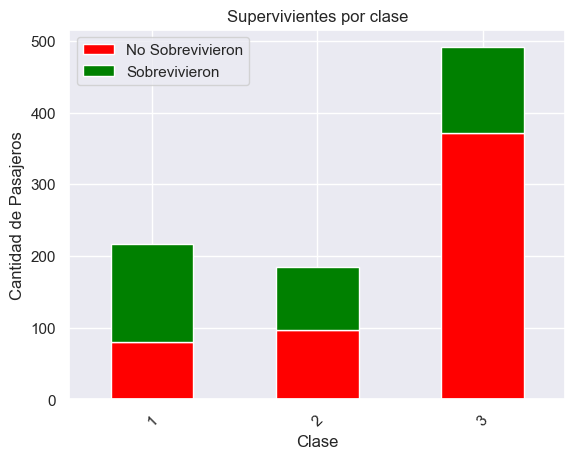

In [35]:
Superviviente_por_clase.plot(kind='bar', stacked=True, color=['red', 'green'])
# Creamos el grafico de barras, creando una legenda para distinguir a los que sobrevivieron y los que no 

plt.xlabel('Clase')
plt.ylabel('Cantidad de Pasajeros')
plt.title('Supervivientes por clase')
plt.legend(['No Sobrevivieron', 'Sobrevivieron'])
plt.xticks(rotation=45)
plt.show()

De esta gráfica podemos ver como la clase 3, la peor, fue la más perjudicada a la hora de sobrevivir al accidente, siendo por contrapartida, la 1, la mejor clase, donde más pasajeros sobrevivieron, más de la mitad.

In [36]:
# Calcular el porcentaje de supervivencia para cada clase
Superviviente_por_clase['Porcentaje_supervivientes'] = (Superviviente_por_clase[1] / (Superviviente_por_clase[0] + Superviviente_por_clase[1])) * 100

datos = pd.DataFrame({'Clase': Superviviente_por_clase.index, 'Porcentaje de supervivencia': Superviviente_por_clase['Porcentaje_supervivientes']})

fig = px.bar(datos, x='Clase', y='Porcentaje de supervivencia', text='Porcentaje de supervivencia', title='Porcentaje de supervivencia por clase', width=800, height=600)
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_xaxes(title_text='Clase')
fig.update_yaxes(title_text='Porcentaje de supervivencia')
fig.update_traces(marker_color='#00FF00')
fig.update_layout(title_font_size=28, xaxis_title_font_size=20, yaxis_title_font_size=20)

fig.show()


Como conclusión y uno de los primeros datos más importantes que hemos podido extraer en este proyecto, es que en función de la clase en la que estuvieras, la que hubieras adquirido previamente a subir al barco, las probabilidades de sobrevivir cambiaban, es por ello que si comprabas el billete de clase 1, las probabilidades de sobrevivir eran más de la mitad, en comparaación en las otras dos clases, era inferior a la mitad, llegando incluso a la cifra de que en la clase 3, solamente una persona de cada 4 sobrevivió. Esto puede jugar un papel muy importante de cara al futuro ya que es un arma a usar para los departamentos de marketing de cualquier crucero a la hora de vender que tipo de billete comprar a los futuros pasajeros.

#### ¿Y la relación entre la edad y el género con la supervivencia?

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



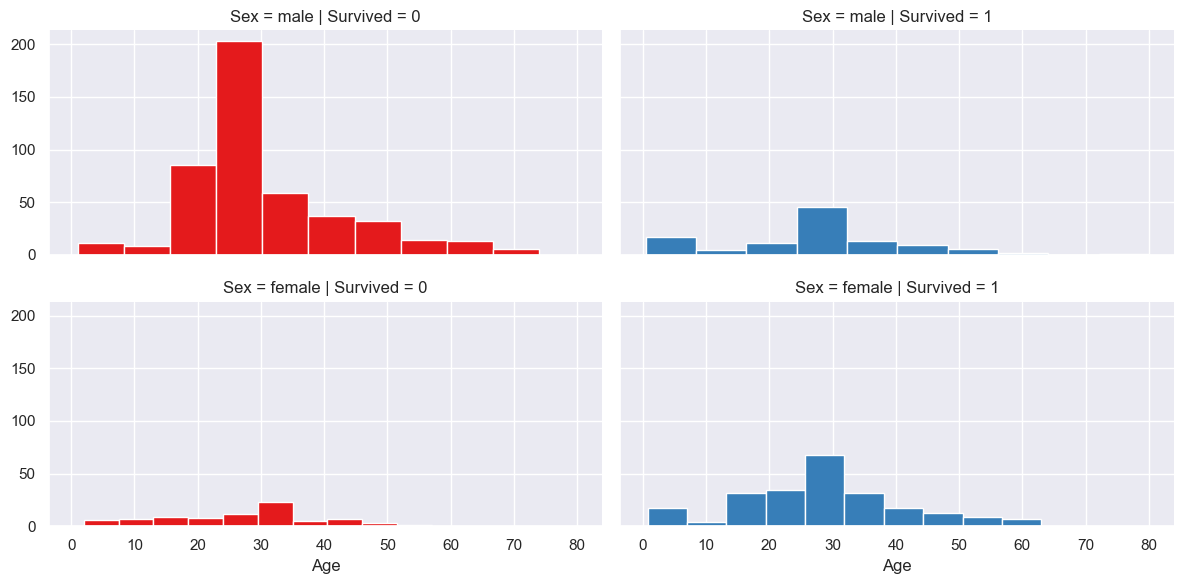

In [37]:
g = sns.FacetGrid(df, col="Survived", row="Sex", hue='Survived', aspect=2, palette='Set1')
g = g.map(plt.hist, "Age")

#### ¿Cual es la tasa de supervivencia de las familias?

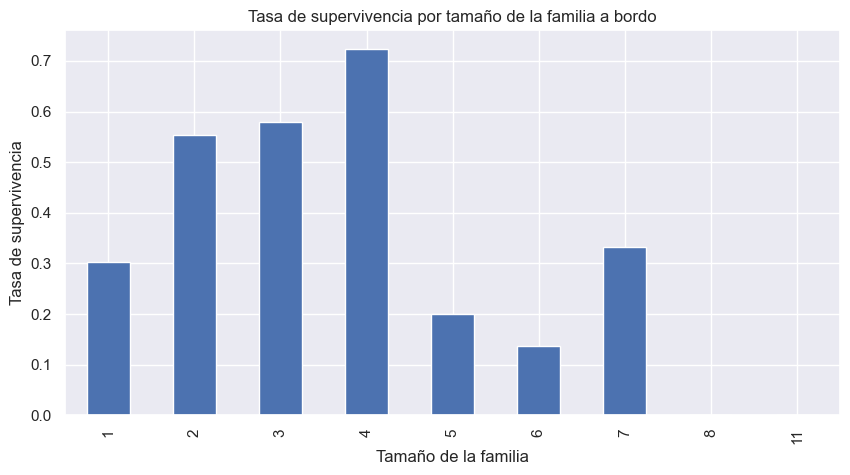

In [38]:
# Calcular el tamaño de la familia
df['Family'] = df['Parch'] + df['SibSp'] + 1

# Calcular la tasa de supervivencia por tamaño de la familia
Supervivientes_familia = df.groupby('Family')['Survived'].mean()

# Visualizar la tasa de supervivencia por tamaño de la familia
Supervivientes_familia.plot(kind='bar', figsize=(10, 5))
plt.title('Tasa de supervivencia por tamaño de la familia a bordo')
plt.xlabel('Tamaño de la familia')
plt.ylabel('Tasa de supervivencia')
plt.show()

Aquí tenemos reflejado como las familias de 4 tenían más posibilidades de sobrevivir que los que iban solos o eran 6.

#### ¿Cuales fueron los 25 billetes más caros?¿Quien los compró?

In [39]:
billetes_mas_caros = df.nlargest(25, 'Fare')
print(billetes_mas_caros)

     PassengerId  Survived  Pclass  \
258          259         1       1   
679          680         1       1   
737          738         1       1   
27            28         0       1   
88            89         1       1   
341          342         1       1   
438          439         0       1   
311          312         1       1   
742          743         1       1   
118          119         0       1   
299          300         1       1   
380          381         1       1   
557          558         0       1   
700          701         1       1   
716          717         1       1   
527          528         0       1   
377          378         0       1   
689          690         1       1   
730          731         1       1   
779          780         1       1   
318          319         1       1   
856          857         1       1   
268          269         1       1   
332          333         0       1   
609          610         1       1   

           

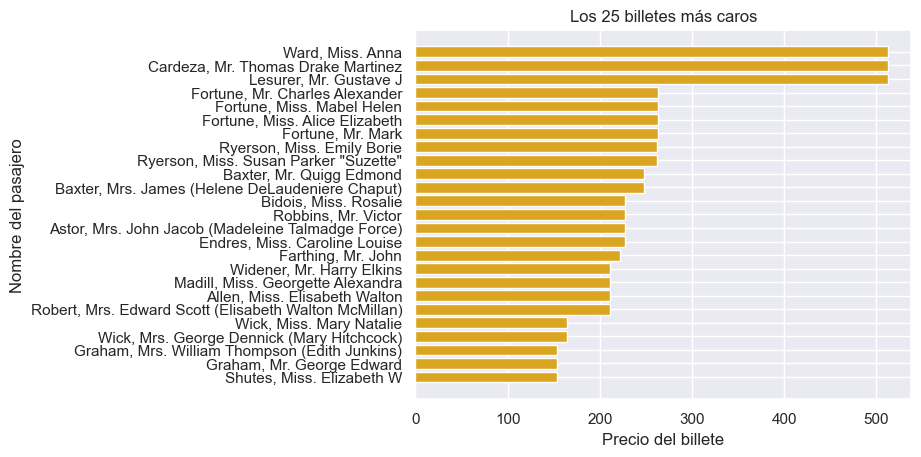

In [40]:
# Gráfico de barras horizontales
plt.barh(billetes_mas_caros['Name'], billetes_mas_caros['Fare'], color='#DAA520') # Color dorado
plt.xlabel('Precio del billete')
plt.ylabel('Nombre del pasajero')
plt.title('Los 25 billetes más caros')
plt.gca().invert_yaxis()  # Invierto el eje para que aparezcan los más caros arriba
plt.show()


#### ¿Y los 25 billetes más baratos?¿Quien los compró?

In [41]:
billetes_mas_baratos = df.nsmallest(25, 'Fare')
print(billetes_mas_baratos)

     PassengerId  Survived  Pclass                              Name     Sex  \
179          180         0       3               Leonard, Mr. Lionel    male   
263          264         0       1             Harrison, Mr. William    male   
271          272         1       3      Tornquist, Mr. William Henry    male   
277          278         0       2       Parkes, Mr. Francis "Frank"    male   
302          303         0       3   Johnson, Mr. William Cahoone Jr    male   
413          414         0       2    Cunningham, Mr. Alfred Fleming    male   
466          467         0       2             Campbell, Mr. William    male   
481          482         0       2  Frost, Mr. Anthony Wood "Archie"    male   
597          598         0       3               Johnson, Mr. Alfred    male   
633          634         0       1     Parr, Mr. William Henry Marsh    male   
674          675         0       2        Watson, Mr. Ennis Hastings    male   
732          733         0       2      

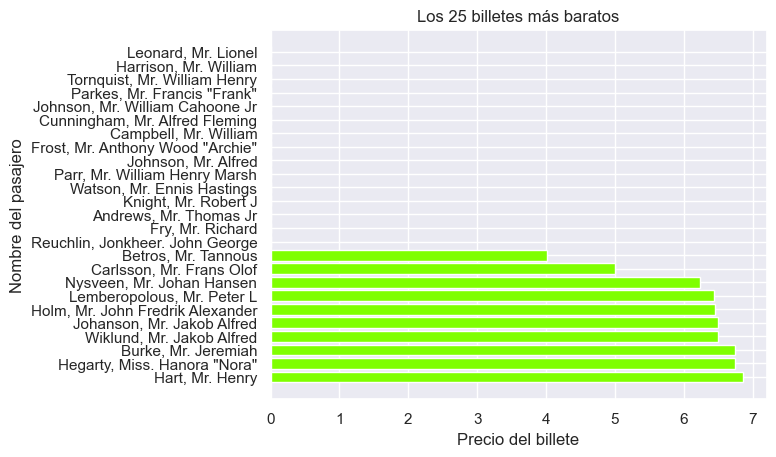

In [42]:
plt.barh(billetes_mas_baratos['Name'], billetes_mas_baratos['Fare'], color='#7FFF00')
plt.xlabel('Precio del billete')
plt.ylabel('Nombre del pasajero')
plt.title('Los 25 billetes más baratos')
plt.gca().invert_yaxis()  # Invierto el eje para que aparezcan los más caros arriba
plt.show()


En esta comparación de caro y barato sacamos varias conclusiones, la primera sería el poco coste de los más barato así como algunos que no costaron nada, puede deberse a invitaciones o gente que se coló en el barco. Asimismo esto está relacionado con la superviviencia y el genero, dentro de los más caros se ve igualdad en el numero de mujeres y hombres asi como una mayor tasa de supervivencia, por el contrario en los más baratos, vemos como la mayoría fueron hombres y asimismo como la mayoría no sobrevivieron.

#### ¿Cual es la relacion entre el precio y el puerto de embarcadero?

In [43]:
df.groupby('Embarked')['Fare'].describe()


,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,168.0,59.954144,83.912994,4.0125,13.69795,29.70,78.500025,512.3292
Q,77.0,13.276030,14.188047,6.7500,7.75000,7.75,15.500000,90.0000
S,646.0,27.243651,35.952905,0.0000,8.05000,13.00,27.900000,263.0000


In [44]:
fig = px.box(df, x='Embarked', y='Fare', 
             title='Distribución de precios de billete por puerto de embarque', 
             category_orders={"Embarked": ["S", "C", "Q"]},
             template="plotly_dark", color='Embarked')
fig.update_yaxes(title='Precio')
fig.update_xaxes(title='Puerto de embarque')

fig.show()

Vemos reflejado como el puerto C fue donde más caros eran los billetes, en contrapartida, el Q era el más barato.

#### ¿Cual fue el puerto de embarque donde sobrevivieron más personas?

In [45]:
# Primero hay que agrupar la columna clase y supervivientes
Superviviente_por_puerto = df.groupby(['Embarked', 'Survived']).size().unstack()
print(Superviviente_por_puerto)

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  219


Vemos como el puerto donde más gente embarco fue el S y el que menos fue el Q.

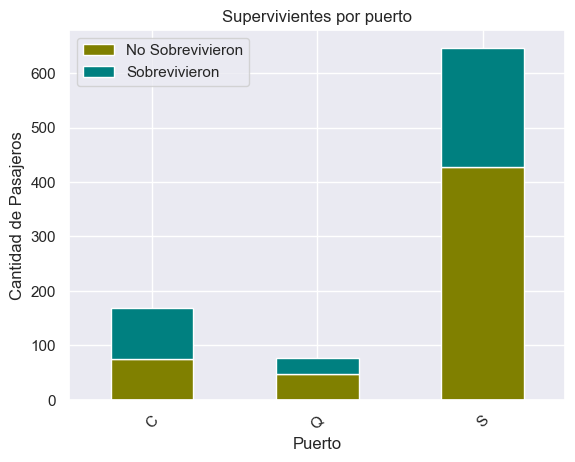

In [46]:
Superviviente_por_puerto.plot(kind='bar', stacked=True, color=['#808000', '#008080'])
# Creamos el grafico de barras, creando una legenda para distinguir a los que sobrevivieron y a los que no

plt.xlabel('Puerto')
plt.ylabel('Cantidad de Pasajeros')
plt.title('Supervivientes por puerto')
plt.legend(['No Sobrevivieron', 'Sobrevivieron'])
plt.xticks(rotation=45)
plt.show()

¿Cual de los 3 tiene la tasa más alta de supervivencia?

In [47]:
Superviviente_por_puerto['Porcentaje_supervivientes'] = (Superviviente_por_puerto[1] / (Superviviente_por_puerto[0] + Superviviente_por_puerto[1])) * 100

In [48]:
datos1 = pd.DataFrame({'Puerto': Superviviente_por_puerto.index, 'Porcentaje de supervivencia': Superviviente_por_puerto['Porcentaje_supervivientes']})

fig = px.bar(datos1, x='Puerto', y='Porcentaje de supervivencia', text='Porcentaje de supervivencia', title='Porcentaje de supervivencia por puerto de embarque', width=800, height=600, template="plotly_dark")
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_xaxes(title_text='Puerto de embarque')
fig.update_yaxes(title_text='Porcentaje de supervivencia')
fig.update_traces(marker_color='#FA8072')
fig.update_layout(title_font_size=28, xaxis_title_font_size=20, yaxis_title_font_size=20)

fig.show()

Aquí tenemos otra de las conclusiones más interesantes de la extracción de datos y es que dependiendo del puerto donde hubieses embarcado, las probabilidades de sobrevivir eran unas u otras, al igual que con la clase. Concluyendo con que el puerto de embarque C era la mejor elección.

## Conclusión

Como resultado general, vemos que efectivamente, como nos proponíamos en los objetivos del proyecto, sí hay variables que influian directamente en la supervivencia del pasajero, como por ejemplo son, la clase en la que se viajaba, el puerto donde se embarcaba, el precio del billete, la edad del pasajero e incluso el género. Unos resultados algo esperados ya que fue una tragedia bastante mediatica y a su vez hace ya más de 100 años desde que ocurrió, por lo que la información tanto escrita como cinematográfica que tenemos es amplia, pero asimismo, soprende el ver las cifras reales y ponerte en la situación de esas personas que por elegir una clase en la que viajar por ejemplo o el puerto donde embarcar, sus posibilidades de sobrevivir se duplicaban practicamente.

En resumen, el género femenino sobrevivió mucho más que el masculino, la gente con dinero que se podía permitir viajar en primera clase y embarcar en Cherbourg tuvo la oportunidad de salvarse, en contrapartida a las otras dos clases y puertos de embarque. Queda demostrado como nos decían que los niños, al igual que las mujeres fueron evacuados del barco con preferencia en detrimento de las personas mayores y los hombres, y por último, un dato curioso, si viajabas con una familia de 4 personas, tenías la mayor probabilidad de sobrevivir a la tragedia.